True


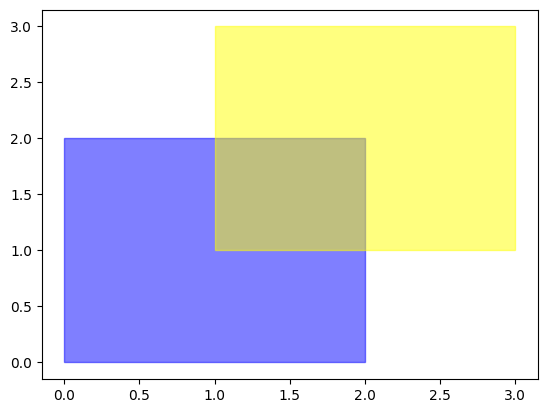

In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

def draw_polygon(polygon, color):
	x, y = polygon.exterior.xy
	plt.fill(x, y, color=color, alpha=0.5)

# two polygons with overlap
p1 = Polygon([(0, 0), (0, 2), (2, 2), (2, 0)])
p2 = Polygon([(1, 1), (1, 3), (3, 3), (3, 1)])
# draw polygons
draw_polygon(p1, 'blue')
draw_polygon(p2, 'yellow')

# check if the two polygons overlap
print(p1.overlaps(p2))  # True

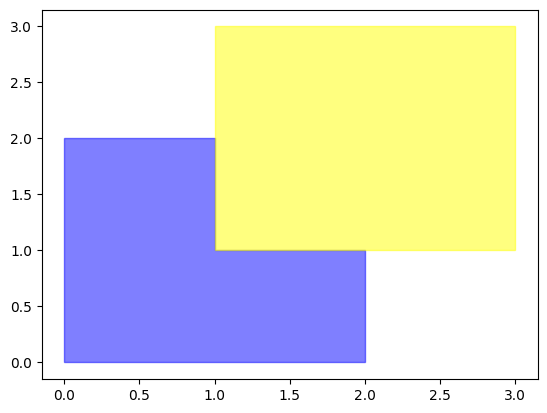

In [2]:
# if overlap, cut the overlapping part of the first polygon for the second polygon
if p1.overlaps(p2):
    p1 = p1.difference(p2)
    draw_polygon(p1, 'blue')
    draw_polygon(p2, 'yellow')
    plt.show()

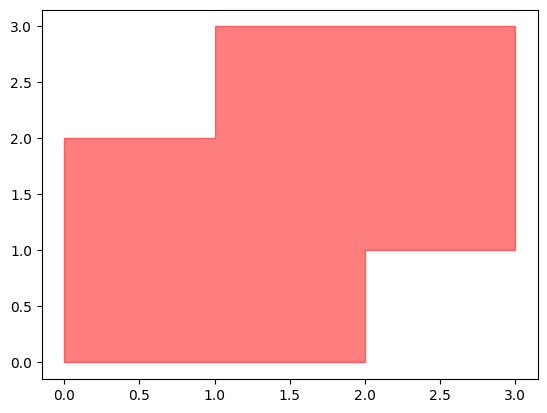

In [3]:
p_u = p1.union(p2)
draw_polygon(p_u, 'red')
plt.show()

In [4]:
from shapely.geometry import Polygon

A = Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])  # Square
B = Polygon([(2, 0), (4, 0), (4, 2), (2, 2)])  # Square touching A

print(A.touches(B))   # ✅ True (they share an edge)
print(A.overlaps(B))  # ❌ False (they don’t share an interior region)


True
False


In [5]:
from shapely.geometry import Polygon, LineString, Point

poly = Polygon([(0, 0), (4, 0), (4, 4), (0, 4)])  # 正方形
line_touch = LineString([(4, 1), (4, 3)])  # 仅触碰 Polygon 右边界
line_intersect = LineString([(3, 1), (5, 3)])  # 部分穿入 Polygon
line_inside = LineString([(1, 1), (3, 3)])  # 完全包含 Polygon

print(line_touch.intersects(poly))  # ✅ True（接触）
print(line_intersect.intersects(poly))  # ✅ True（部分交叉）
print(line_inside.intersects(poly))  # ✅ True（完全包含）


True
True
True
